In [239]:
# Create data file without duplicates

%load_ext autoreload
%autoreload 2

df = pd.read_csv("data/results.txt", sep = ',')
print(len(df))
df = df.drop_duplicates()
print(len(df))
df.to_csv("data/addressesWithoutDuplicates.txt", sep = ',')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
756
686


In [240]:
# Read in data
# Note that these distances aren't straight line distances, they're distances of the entire route

import pandas as pd

df = pd.read_csv("data/addressesWithoutDuplicates.txt", sep = ',')

df['City'] = np.array([city.title() for city in df['City']])
df['Distance'] = df['Distance'] / 1000.0
df['TravelTime'] = df['TravelTime'] / 60.0

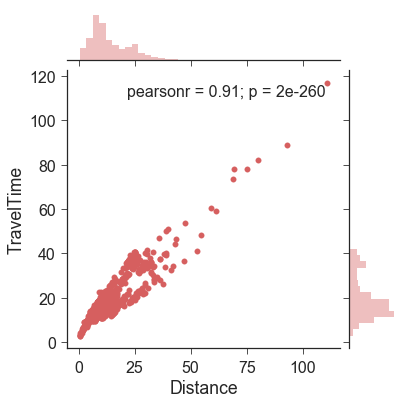

In [241]:
# Plot travel time vs. distance

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Arial"

sns.set(
        context='paper', 
        style='ticks', 
        font='Arial', 
        font_scale=2, 
        )

sns.set_color_codes("muted")

sns.jointplot(x = df['Distance'], y = df['TravelTime'], color = 'r')
plt.show()

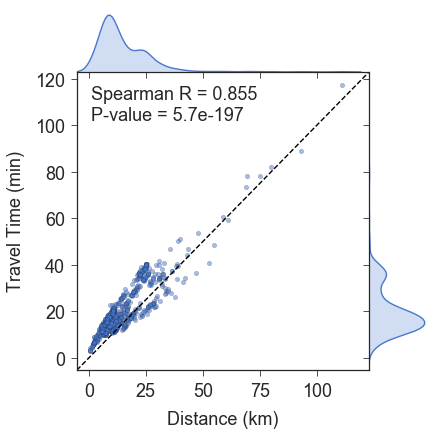

In [227]:
# Make a prettier joint plot

import plot_functions2
import numpy as np

plot_functions2.jointplot(np.array(df['Distance']), 
              np.array(df['TravelTime']),
              out_pdf = 'figures/distanceVsTravelTime.png',
              show=True,
              square=True,
              despine=False,
              cor='spearmanr',
              kde=True,
              x_label='Distance (km)',
              y_label='Travel Time (min)',
              figsize=6,
              color = 'b',
              point_size=20,
             )

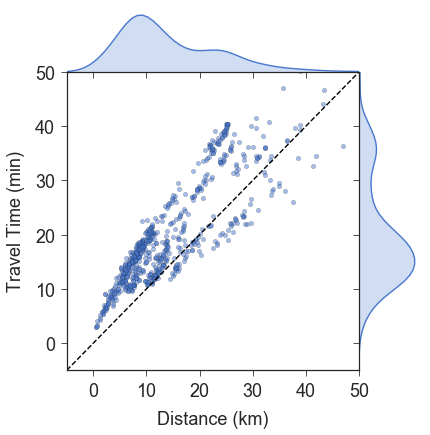

In [228]:
# Plot the same data, except only include distances and travel times less than 50 (exclude outliers)

plot_functions2.jointplot(np.array(df['Distance']), 
              np.array(df['TravelTime']),
              out_pdf = 'figures/distanceVsTravelTimeTruncated.png',
              show=True,
              square=True,
              despine=False,
              cor=None,
              kde=True,
              x_label='Distance (km)',
              y_label='Travel Time (min)',
              figsize=6,
              color = 'b',
              point_size=20,
              axlim = [-5, 50]
             )

In [230]:
# Identify the most common cities

from collections import Counter, OrderedDict

cityCountsUnsorted = OrderedDict(Counter(df['City']))
order = np.array(cityCountsUnsorted.keys())[np.argsort(cityCountsUnsorted.values())[::-1]]

cityCounts = OrderedDict()
for k in order:
    cityCounts[k] = cityCountsUnsorted[k]
    
print cityCounts

OrderedDict([(' San Jose', 201), (' Saratoga', 107), (' Cupertino', 73), (' Sunnyvale', 49), (' Los Altos', 45), (' Los Gatos', 37), (' Fremont', 28), (' Santa Clara', 28), (' Campbell', 21), (' Palo Alto', 14), (' Los Altos Hills', 11), (' Milpitas', 11), (' Mountain View', 10), (' Monte Sereno', 8), (' Menlo Park', 8), (' Portola Valley', 6), (' Atherton', 6), (' Redwood City', 4), (' San Carlos', 2), (' Woodside', 2), (' Mtn. View', 1), (' Stanford', 1), (' Danville', 1), (' Discovery Bay', 1), (' Burlingame', 1), (' Belmont', 1), (' Hayward', 1), (' Emerald Hills', 1), (' Mt. View', 1), (' San Ramon', 1), (' Dublin', 1), (' Foster City', 1), (' Hollister', 1), (' Pleasanton', 1), (' Half Moon Bay', 1)])


         City Measurement   value
1    San Jose    Distance  23.976
2   Sunnyvale    Distance   7.416
3   Los Altos    Distance  11.681
4   Los Altos    Distance  12.015
5    Saratoga    Distance   5.838


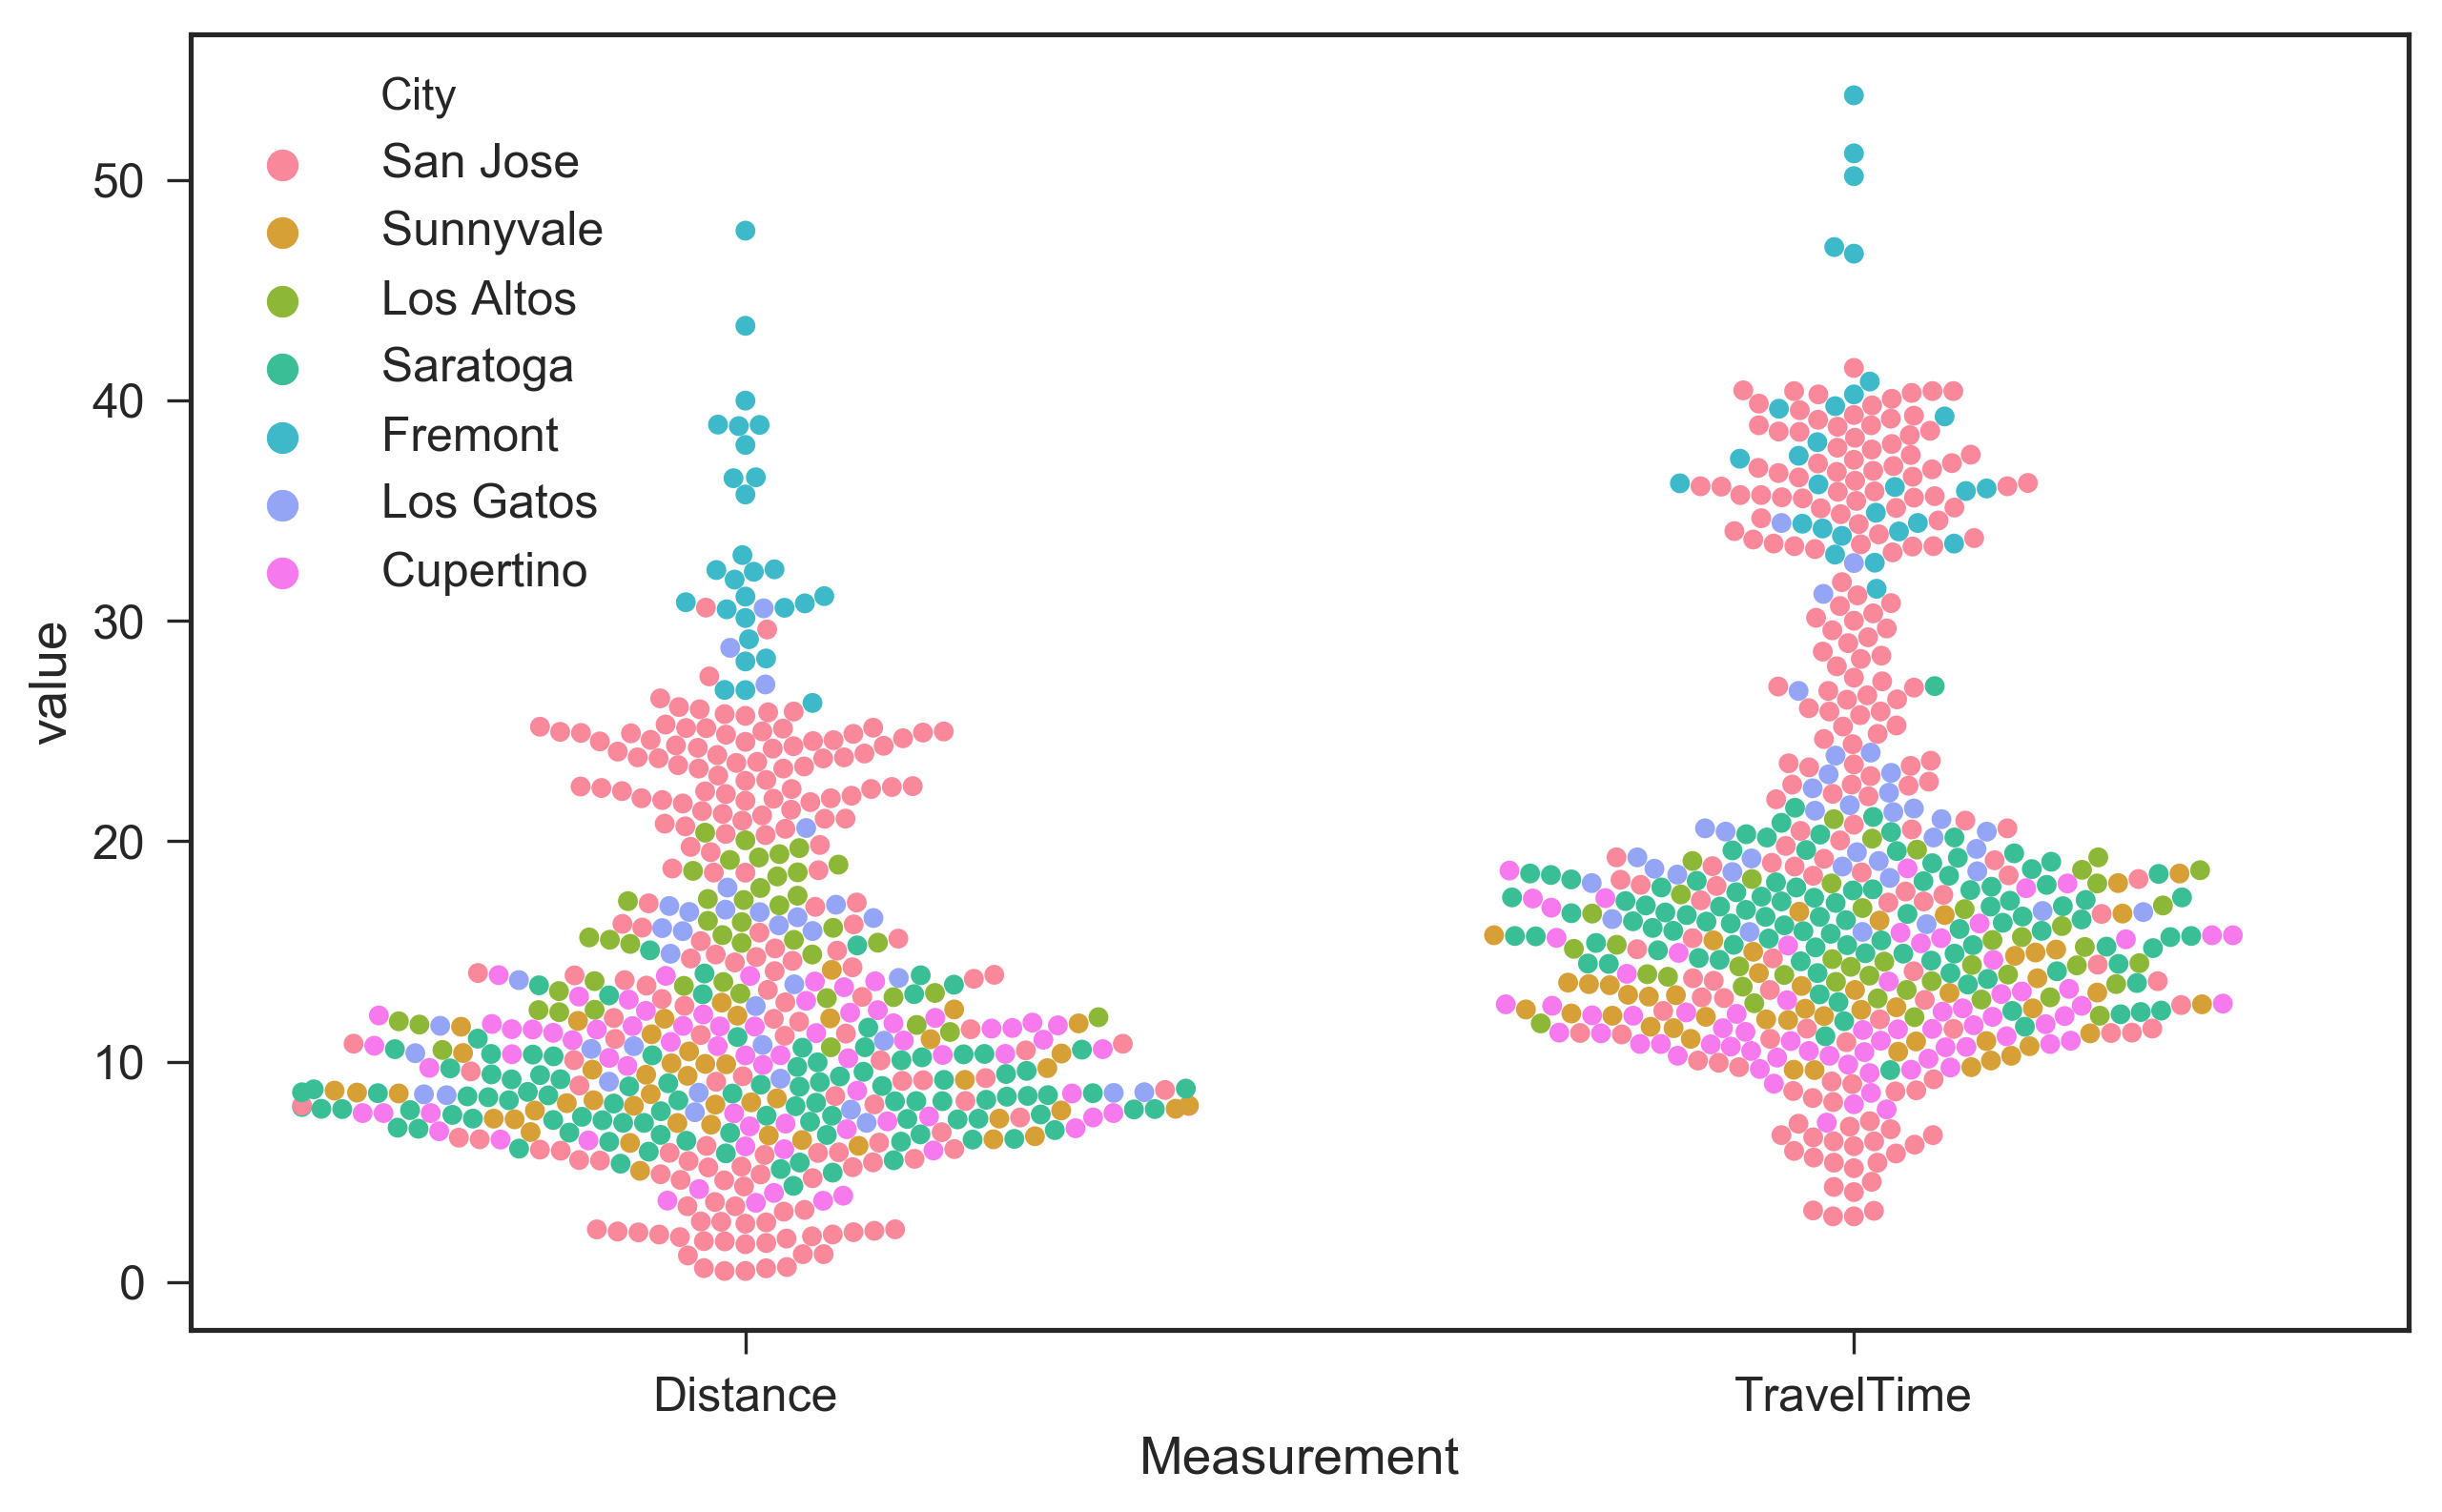

In [231]:
# Generate a "swarm plot" showing distances and travel times for most popular cities

import pandas as pd
import seaborn as sns

# "Melt" the dataset to "long-form" or "tidy" representation
df_swarm = pd.melt(df[['City', 'Distance', 'TravelTime']], "City", var_name="Measurement")

topCities = cityCounts.keys()[:7]
df_swarm = df_swarm[[city in topCities for city in df_swarm['City']]]

print df_swarm.head()

sns.set(
        context='paper', 
        style='ticks', 
        font='Arial', 
        font_scale=1.5, 
        )

sns.set_color_codes("bright")

plt.figure(figsize=(10,6), dpi=300)

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="Measurement", y="value", hue="City", data=df_swarm, size=5)

plt.savefig("figures/swarmPlotAllCities.png", dpi=300)
plt.show()

           City Measurement      value
687    San Jose  TravelTime  38.566667
688   Sunnyvale  TravelTime  11.583333
689   Los Altos  TravelTime  12.816667
690   Los Altos  TravelTime  13.250000
691    Saratoga  TravelTime  12.700000


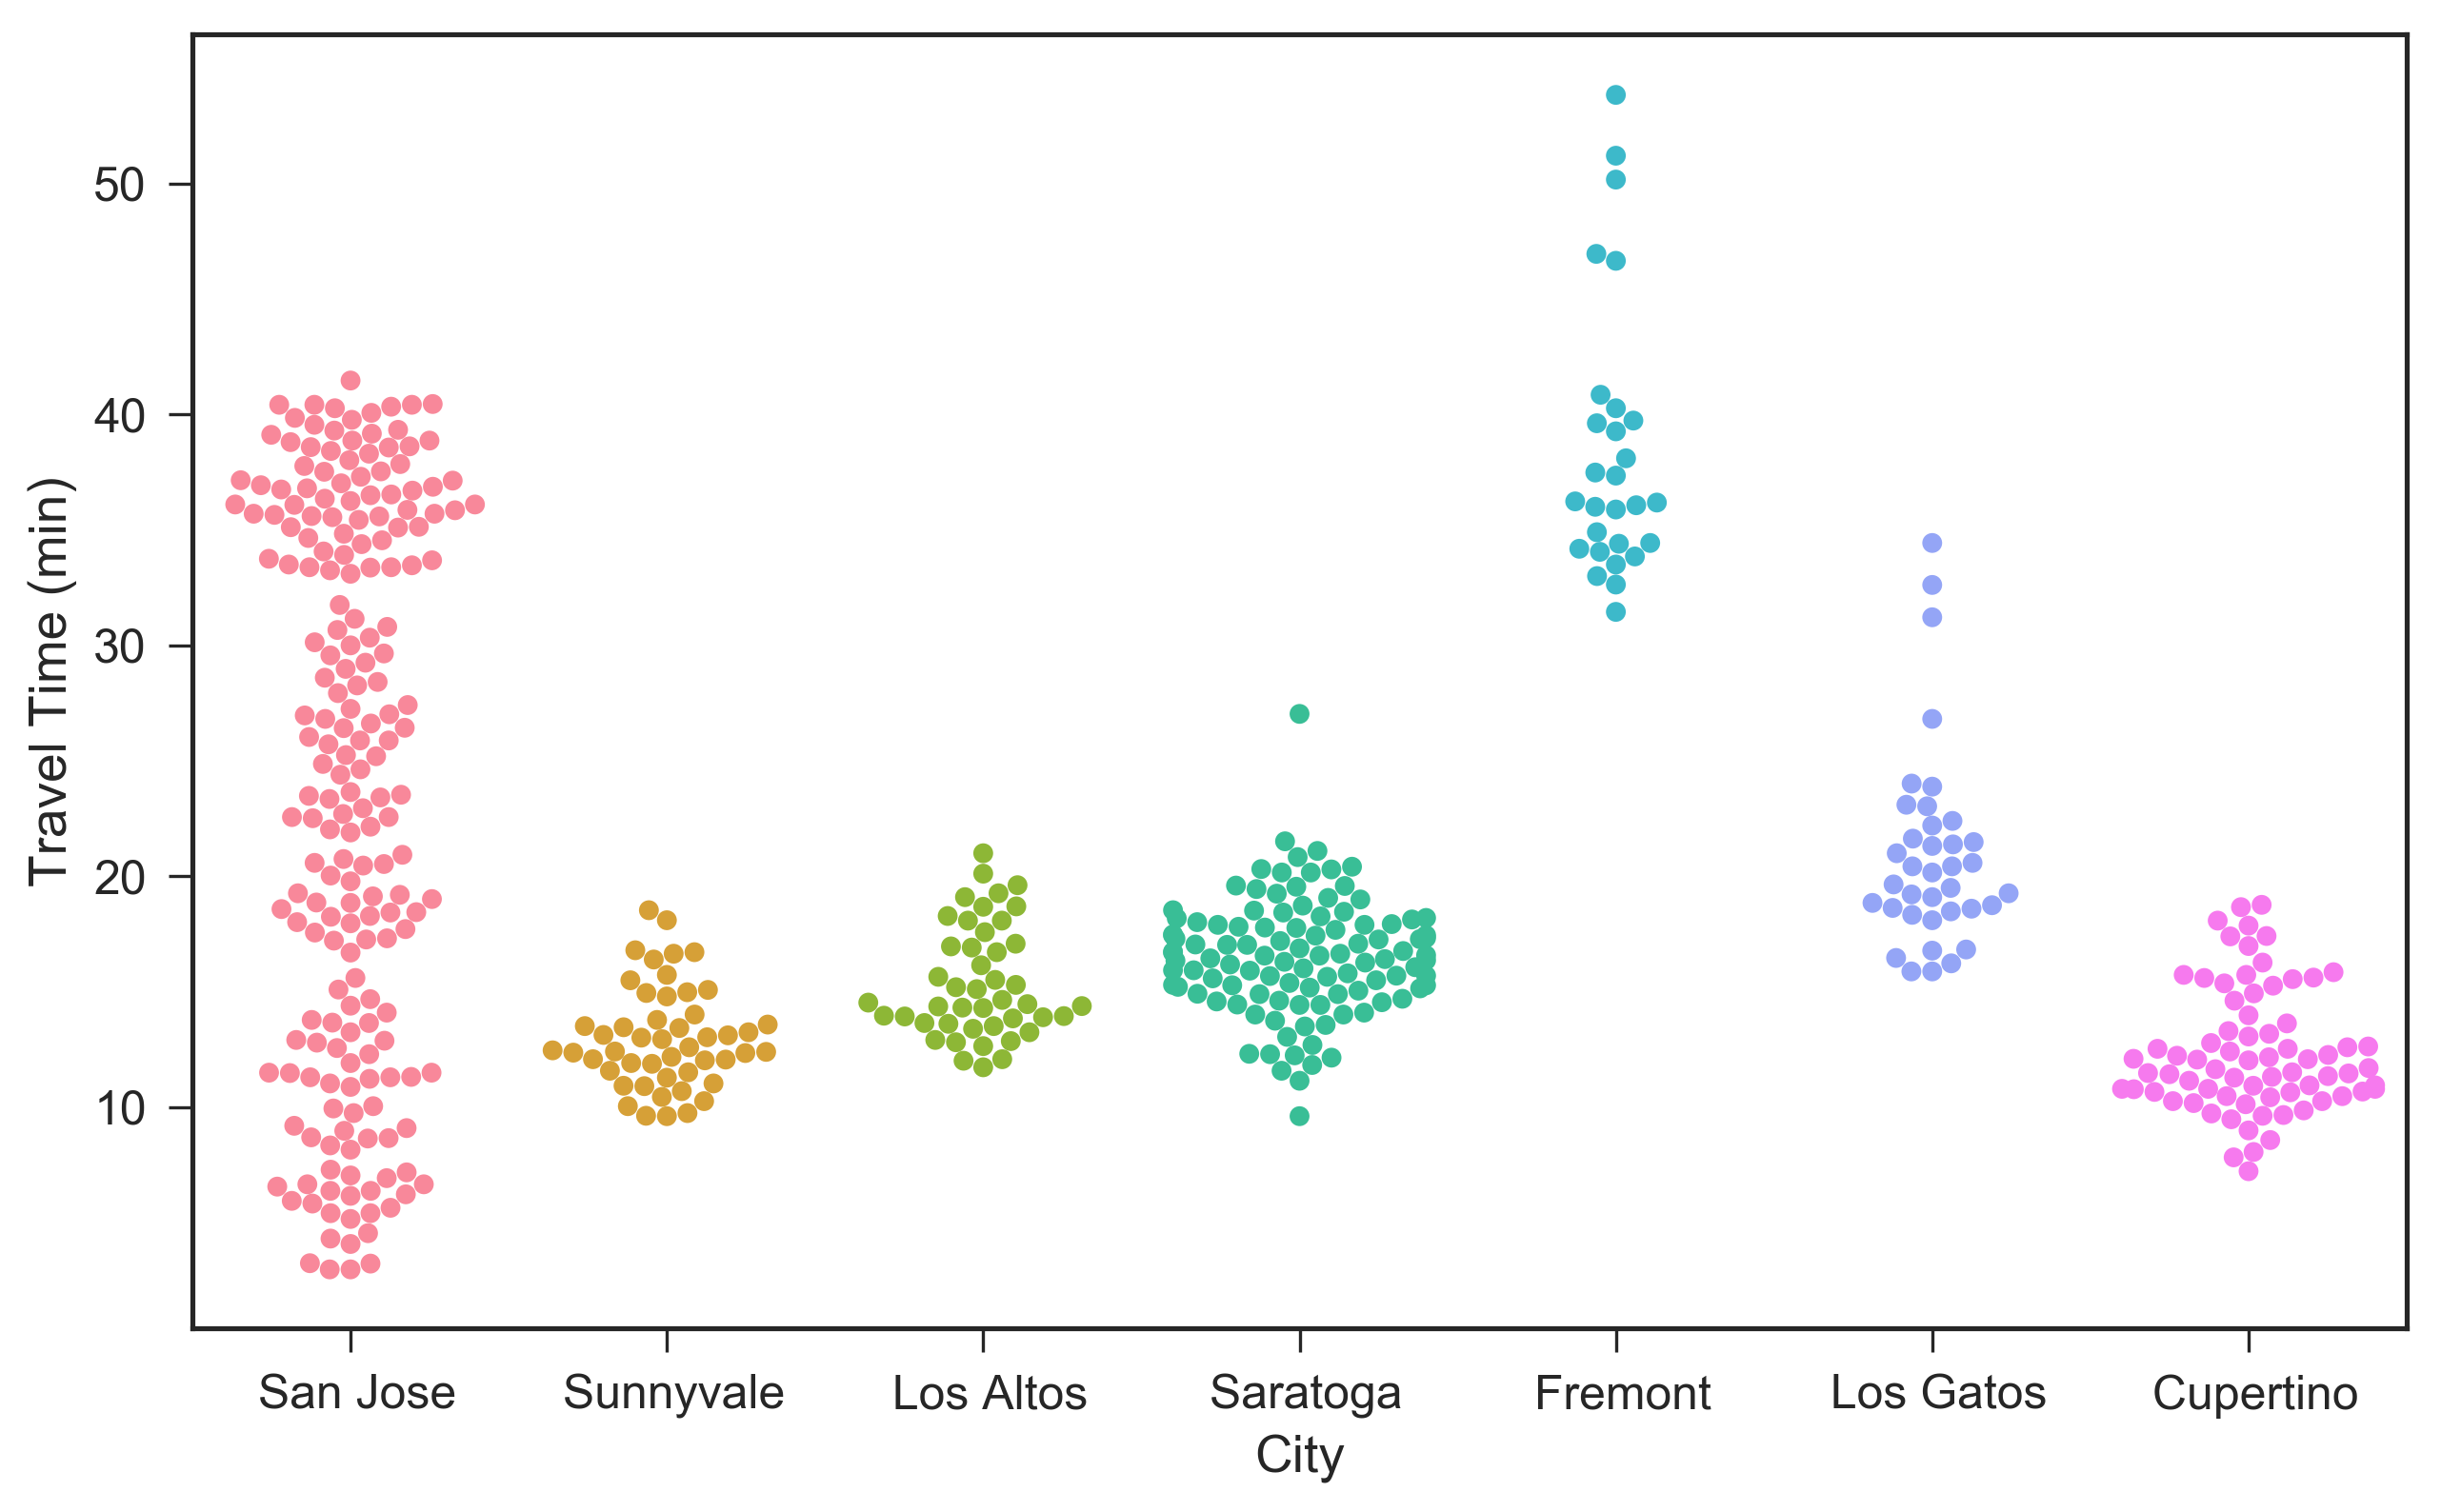

In [232]:
# Swarm plots of travel times, separated by city

df_swarm_times = df_swarm[df_swarm['Measurement'] == 'TravelTime']

print df_swarm_times.head()

plt.figure(figsize=(10,6), dpi=300)

ax = sns.swarmplot(x="City", y="value", data=df_swarm_times, size=5);
ax.set_ylabel("Travel Time (min)");
plt.savefig("figures/swarmPlotByCity.png", dpi=300)
plt.show()

In [243]:
# Add straight-line distances (slDistance) between houses and Harker as a column in the DataFrame

import geopy
from geopy.distance import geodesic

harkerLat = 37.318034
harkerLong = -121.971682

harker = (harkerLat, harkerLong)

slDistances = []
for index, row in df.iterrows():
    loc = (row['Lat'], row['Long'])
    slDistance = geodesic(harker, loc).km
    slDistances.append(slDistance)
    
df['slDistance'] = np.array(slDistances)

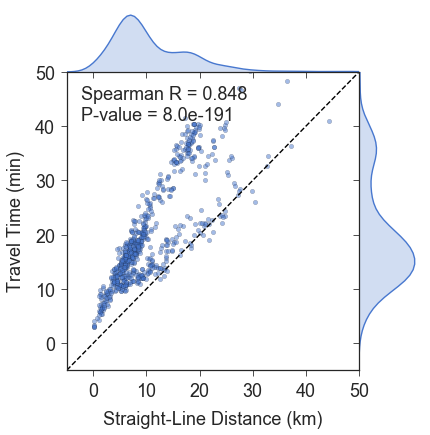

In [244]:
sns.set_color_codes("muted")

plot_functions2.jointplot(np.array(df['slDistance']), 
              np.array(df['TravelTime']),
              out_pdf = 'figures/straightLineDistanceVsTravelTime.png',
              show=True,
              square=True,
              despine=False,
              cor='spearmanr',
              kde=True,
              x_label='Straight-Line Distance (km)',
              y_label='Travel Time (min)',
              figsize=6,
              color = 'b',
              point_size=20,
              axlim = [-5,50]
             )

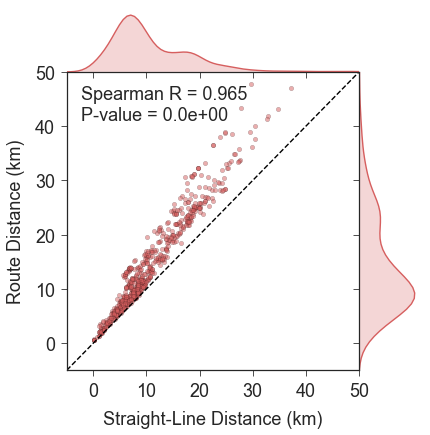

In [248]:
plot_functions2.jointplot(np.array(df['slDistance']), 
              np.array(df['Distance']),
              out_pdf = 'figures/straightLineDistanceVsRouteDistance.png',
              show=True,
              square=True,
              despine=False,
              cor='spearmanr',
              kde=True,
              x_label='Straight-Line Distance (km)',
              y_label='Route Distance (km)',
              figsize=6,
              color = 'r',
              point_size=20,
              axlim = [-5,50]
             )

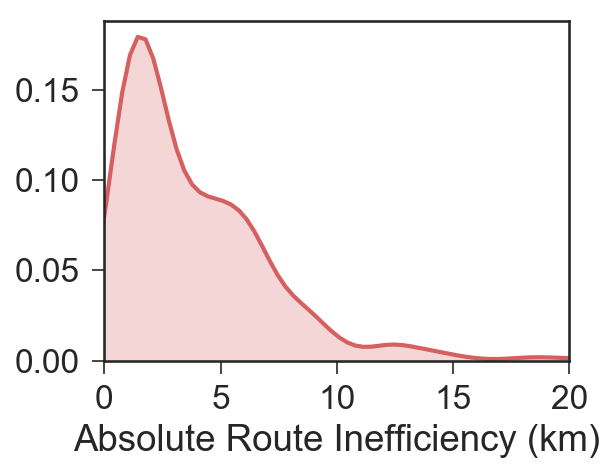

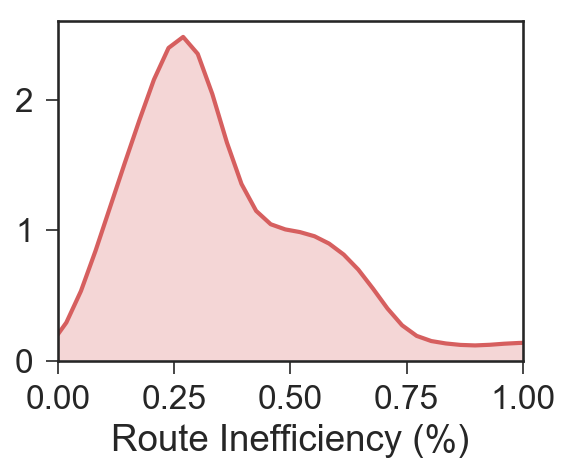

In [270]:
# Define a measure of "route inefficiency": (Route Distance - StraightLine Distance) / StraightLine Distance

df['absinefficiency'] = (df['Distance'] - df['slDistance'])
df['inefficiency'] = (df['Distance'] - df['slDistance']) / df['slDistance']

sns.set_color_codes("muted")

plt.figure(figsize=(4,3), dpi=150)
# ax = sns.distplot(df['inefficiency'], kde=False, color = 'g')
ax = sns.kdeplot(df['absinefficiency'], shade=True, lw=2, color = 'r')

ax.set_xlim(0, 20)
ax.set_xlabel("Absolute Route Inefficiency (km)")
ax.legend_.remove()

plt.show("figures/absInefficiencyHistogram.png")
plt.show()

plt.figure(figsize=(4,3), dpi=150)
# ax = sns.distplot(df['inefficiency'], kde=False, color = 'g')
ax = sns.kdeplot(100*df['inefficiency'], shade=True, lw=2, color = 'r')

ax.set_xlim(0, 1)
ax.set_xlabel("Route Inefficiency (%)")
ax.legend_.remove()

plt.show("figures/relativeInefficiencyHistogram.png")
plt.show()